In [1]:
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split,KFold
import matplotlib.pyplot  as plt
from xgboost import plot_importance
from sklearn.metrics import mean_squared_error as MSE, mean_absolute_error as MAE

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [13]:
import tensorflow as tf 
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [14]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
train = pd.read_excel("实验数据.xlsx",sheet_name='Sheet1')
X = train[['At0', 'V', 'Ec_mol/L', '4p_g/L', 'time']]
Y = train[['At']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train[:4]

,At0,V,Ec_mol/L,4p_g/L,time
18,0.333,5,0.025,0.08,90
203,1.579,5,0.025,0.08,90
351,3.869,10,0.025,0.08,90
275,3.216,10,0.025,0.08,60


# 交叉验证确定模型的稳定性


In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
import numpy as np

# 初始化模型
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(),
    'SVR': SVR(),
    'XGBoost': XGBRegressor(),
}

# 定义交叉验证方法
k = 5

# 循环训练和评估
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train['At'], cv=k, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)
    print(f'{name} RMSE: {np.mean(rmse_scores):.4f} (+/- {np.std(rmse_scores):.4f})')


Linear Regression RMSE: 0.1627 (+/- 0.0220)
Random Forest Regressor RMSE: 0.1190 (+/- 0.0185)
SVR RMSE: 0.6747 (+/- 0.0378)
XGBoost RMSE: 0.1054 (+/- 0.0124)


In [6]:
y_train['At'][12]

0.168

In [7]:
model = tf.keras.Sequential([
        tf.keras.layers.Dense(10, activation='relu', input_shape=(5,)), 
        tf.keras.layers.Dense(5, activation='relu'),
        tf.keras.layers.Dense(1)
    ])
model.summary()
# 查看网络所有的权重w和偏置b
for p in model.trainable_variables:
    print(p.name,p.shape)

NameError: name 'tf' is not defined

In [ ]:
X_ = X_train.values
y_ = y_train['At'].values
# 定义神经网络模型
def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(10, activation='relu', input_shape=(5,)), 
        tf.keras.layers.Dense(5, activation='relu'),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# 定义交叉验证方法
k = 5
kf = KFold(n_splits=k)

# 初始化 RMSE 列表
rmse_scores = []

# 循环训练和评估
for train_index, test_index in kf.split(X_):
    X_train2, X_test2 = X_[train_index], X_[test_index]
    y_train2, y_test2 = y_[train_index], y_[test_index]
    
    # 创建和训练模型
    model2 = create_model()
    model2.fit(X_train2, y_train2, epochs=100, batch_size=32, verbose=0)
    
    # 使用模型进行预测并计算 RMSE
    y_pred2 = model2.predict(X_test2).flatten()
    rmse = np.sqrt(MSE(y_test2, y_pred2))
    rmse_scores.append(rmse)

# 打印稳定性评估结果
print(f'Mean RMSE: {np.mean(rmse_scores):.4f} (+/- {np.std(rmse_scores):.4f})')

# 绘制偏差方差图

In [7]:
def plot_learning_curve(estimator,title, X, y, 
                        ax=None, #选择子图
                        ylim=None, #设置纵坐标的取值范围
                        cv=None, #交叉验证
                        n_jobs=None #设定索要使用的线程
                       ):
    
    from sklearn.model_selection import learning_curve
    import matplotlib.pyplot as plt
    import numpy as np
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y
                                                            ,shuffle=True
                                                            ,cv=cv
                                                            ,random_state=420
                                                            ,n_jobs=n_jobs) 
    print(test_scores)
    if ax == None:
        ax = plt.gca()
    else:
        ax = plt.figure()
    ax.set_title(title)
    if ylim is not None:
        ax.set_ylim(*ylim)
    ax.set_xlabel("Training examples")
    ax.set_ylabel("Score")
    ax.grid() #绘制网格，不是必须
    ax.plot(train_sizes, np.mean(train_scores, axis=1), 'o-'
            , color="r",label="Training score")
    ax.plot(train_sizes, np.mean(test_scores, axis=1), 'o-'
            , color="g",label="Test score")
    ax.legend(loc="best")
    return ax

C:\Users\H\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
C:\Users\H\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
C:\Users\H\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
C:\Users\H\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` inste

C:\Users\H\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
C:\Users\H\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
C:\Users\H\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
C:\Users\H\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` inste

[[0.92322939 0.853536   0.87655487 0.866999   0.83763031]
 [0.95552321 0.91121352 0.92964178 0.96036709 0.89488879]
 [0.98478713 0.92916559 0.97277824 0.97088939 0.9264519 ]
 [0.98801502 0.93236503 0.98085325 0.9680037  0.95905757]
 [0.98706534 0.92918971 0.98314421 0.98666481 0.95973059]]


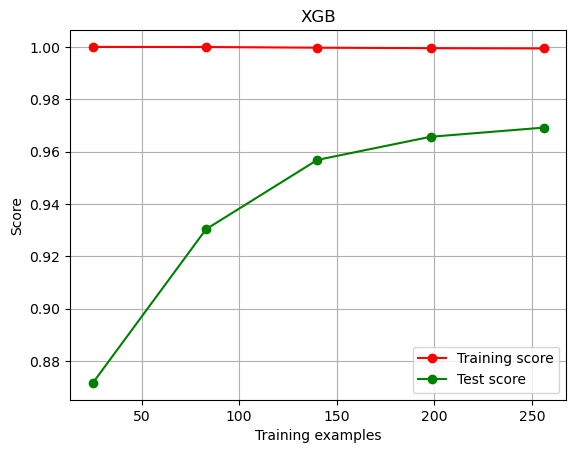

In [8]:
cv = KFold(n_splits=5, shuffle = True, random_state=42) #交叉验证模式
plot_learning_curve(xgb.XGBRegressor(random_state=42)
                    ,"XGB",X_train,y_train,ax=None,cv=cv)
plt.show()

# 开始训练

colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=1001, subsample=0.6, gamma=16, reg_lambda=0.09, reg_alpha=0.005, colsample_bylevel=1, 
max_depth=2, n_estimators=1000,learning_rate=0.06,gamma=0.001,subsample=0.7,reg_lambda=6.1,reg_alpha=0.005, 

In [18]:
def adjusted_r_squared(y_true, y_pred):
    n = np.size(y_true)
    mean_y_true = np.mean(y_true)
    ss_tot = np.sum((y_true - mean_y_true) ** 2)
    ss_res = np.sum((y_true - y_pred.reshape(len(y_pred),1)) ** 2)
    r_squared = 1 - (ss_res / ss_tot)
    adjusted_r_squared = 1 - ((1 - r_squared) * (n - 1) / (n - 5 - 1))
    return adjusted_r_squared

In [19]:
xg_reg = xgb.XGBRegressor(objective='reg:squarederror',max_depth=5,n_estimators=300,learning_rate=0.22,
                          random_state=41)
xg_reg.fit(X_train,y_train)
y_pred = xg_reg.predict(X_test)
y_train_pred = xg_reg.predict(X_train)

print(np.sqrt(MSE(y_train,y_train_pred)))
print(r2_score(y_train,y_train_pred))
print(adjusted_r_squared(y_train,y_train_pred))
print(np.sqrt(MSE(y_test,y_pred)))
print(r2_score(y_test,y_pred))
print(adjusted_r_squared(y_test,y_pred))

0.022161823379911093
0.9992918434975073
At    0.999281
dtype: float64
0.1518015517628386
0.9713795294144714
At    0.969471
dtype: float64


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Feature'>

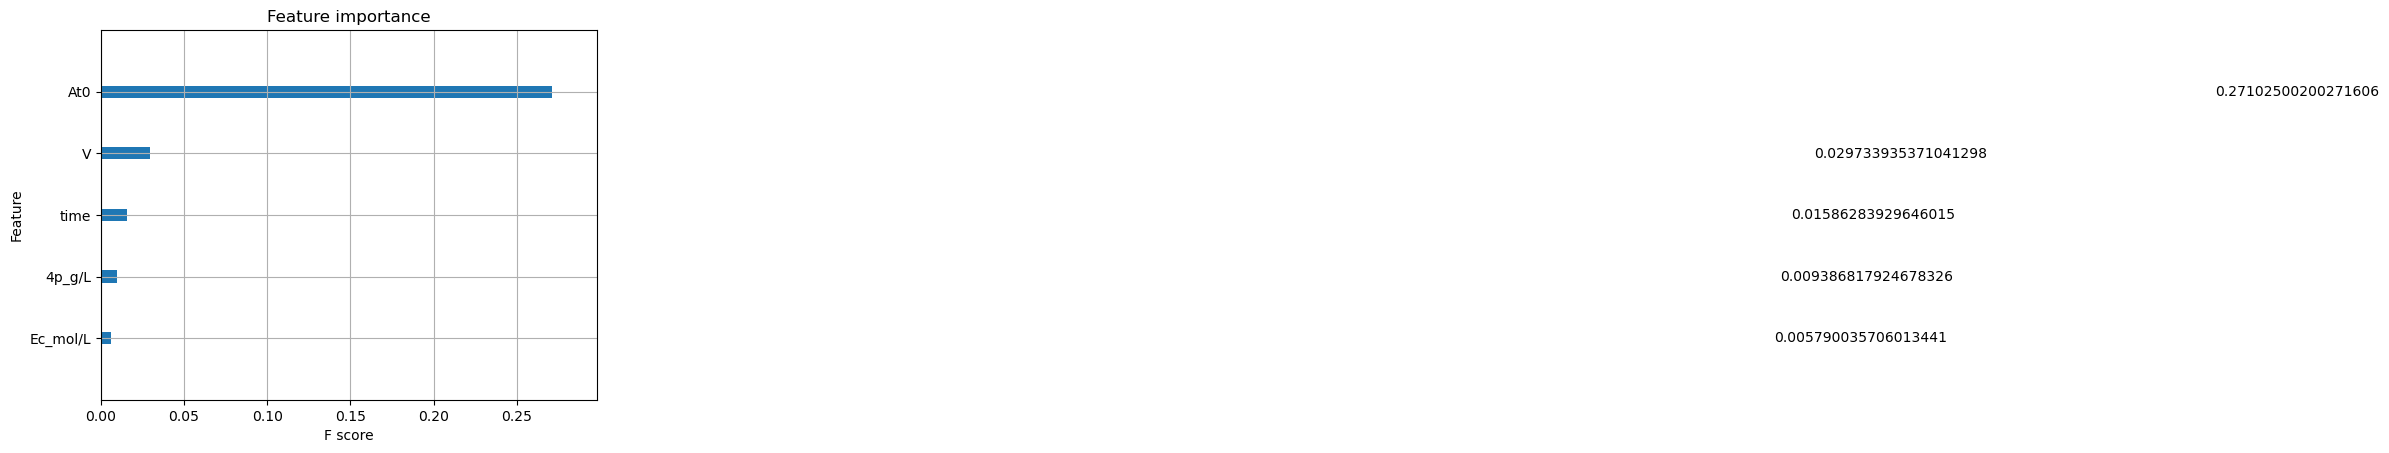

In [12]:
#for importance_type in ('weight', , 'cover', 'total_gain', 'total_cover'):
#    print('%s: ' % importance_type, bst.get_score(importance_type=importance_type))

plot_importance(xg_reg,title='Feature importance',
               xlabel='F score',ylabel='Feature',importance_type='gain')

# 使用tensorflow预测

In [20]:
arr1 = X_train[['At0', 'V', 'Ec_mol/L', '4p_g/L', 'time']]
arr2 = y_train_pred.reshape(-1, 1)
combined_arr = np.concatenate((arr1, arr2), axis=1)
tf_train =  pd.DataFrame(combined_arr, columns=['At0','V', 'Ec_mol/L', '4p_g/L', 'time', 'At'])
tf_train

,At0,V,Ec_mol/L,4p_g/L,time,At
0,0.333,3.0,0.025,0.08,90.0,0.105529
1,3.215,5.0,0.025,0.08,60.0,1.865334
2,0.325,2.0,0.015,0.08,60.0,0.141718
3,3.828,5.0,0.025,0.08,60.0,2.597782
4,0.332,3.0,0.050,0.08,90.0,0.120625
...,...,...,...,...,...,...
315,0.330,3.0,0.100,0.08,20.0,0.237036
316,0.327,3.0,0.150,0.08,90.0,0.104693
317,3.873,3.0,0.025,0.08,60.0,2.442061
318,0.325,3.0,0.015,0.04,60.0,0.183982


In [21]:
arr3 = X_test[['At0', 'V', 'Ec_mol/L', '4p_g/L', 'time']]
arr4 = y_pred.reshape(-1, 1)
combined_arr2 = np.concatenate((arr3, arr4), axis=1)
tf_test =  pd.DataFrame(combined_arr2, columns=['At0','V', 'Ec_mol/L', '4p_g/L', 'time', 'At'])
tf_test

,At0,V,Ec_mol/L,4p_g/L,time,At
0,3.869,10.0,0.025,0.08,90.0,1.978045
1,3.854,10.0,0.025,0.08,60.0,2.521114
2,0.344,4.0,0.025,0.08,60.0,0.145005
3,3.213,10.0,0.025,0.08,60.0,1.589733
4,0.331,3.0,0.150,0.08,90.0,0.134495
...,...,...,...,...,...,...
76,3.236,10.0,0.150,0.08,60.0,1.484603
77,0.336,3.0,0.035,0.12,60.0,0.181803
78,1.631,2.0,0.025,0.80,60.0,0.758757
79,3.828,3.0,0.025,0.08,90.0,1.990639


In [16]:
len(y_train['At'])

320

In [26]:
# 对 XGBoost 的预测结果进行标准化
scaler = StandardScaler()
xg_train_pred_scaled = scaler.fit_transform(tf_train)
xg_test_pred_scaled = scaler.fit_transform(tf_test)

model = tf.keras.Sequential([
            tf.keras.layers.Dense(10, activation='relu', input_shape=(6,)), 
            tf.keras.layers.Dense(10, activation='relu'),
            tf.keras.layers.Dense(1)
            ])
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

model.fit(xg_train_pred_scaled,y_train,epochs=350,verbose=0,)
    # 使用神经网络模型进行预测
neural_network_predictions = model.predict(xg_test_pred_scaled)

print(r2_score(y_test, neural_network_predictions),np.sqrt(MSE(y_test, neural_network_predictions)))

3/3 [==============================] - 0s 997us/step
0.9755269677675564 0.14037239733838505


In [81]:
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 50)                350       
                                                                 
 dense_16 (Dense)            (None, 100)               5100      
                                                                 
 dense_17 (Dense)            (None, 10)                1010      
                                                                 
 dense_18 (Dense)            (None, 1)                 11        
                                                                 
Total params: 6,471
Trainable params: 6,471
Non-trainable params: 0
_________________________________________________________________


In [27]:
    # 对 XGBoost 的预测结果进行标准化
scaler = StandardScaler()
xg_train_pred_scaled = scaler.fit_transform(tf_train)
xg_test_pred_scaled = scaler.fit_transform(tf_test)

model = tf.keras.Sequential([
            tf.keras.layers.Dense(50, activation='relu', input_shape=(6,)), 
            tf.keras.layers.Dense(100, activation='relu'),
            tf.keras.layers.Dense(10, activation='relu'),
            tf.keras.layers.Dense(1)
            ])
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01), loss='mean_squared_error')

model.fit(xg_train_pred_scaled,y_train,epochs=100,verbose=0,)
    # 使用神经网络模型进行预测
neural_network_predictions = model.predict(xg_test_pred_scaled)
print(r2_score(y_test, neural_network_predictions))
print(np.sqrt(MSE(y_test, neural_network_predictions)))

3/3 [==============================] - 0s 2ms/step
0.986586300441404
0.10392310482367297


In [28]:
model.save('model_3.25_9865.h5')

# 确定参数 

In [20]:
from sklearn.model_selection import GridSearchCV,cross_val_score as CVS,KFold

In [147]:
#网格搜索
# 定义参数网格
param_grid = {
     'max_depth': np.arange(2,10,1),
     'gamma':np.arange(0,21,2),
       
}

# 创建网格搜索对象
grid_search = GridSearchCV(
    estimator=xg_reg,
    param_grid=param_grid,
    cv=5,  # 交叉验证折数
    scoring='neg_mean_squared_error',  # 评价指标：负均方误差
    verbose=1
)


# 运行网格搜索
grid_search.fit(X_train, y_train)
# 获取最优参数
best_params = grid_search.best_params_

# 输出最优参数
print("Best parameters:", best_params)

Fitting 5 folds for each of 88 candidates, totalling 440 fits
Best parameters: {'gamma': 0, 'max_depth': 4}


In [134]:
# 使用最优参数构建模型
best_model = grid_search.best_estimator_

# 在测试集上预测
y_pred = best_model.predict(X_test)

# 输出模型性能指标
rmse = np.sqrt(MSE(y_test, y_pred))
r2 = best_model.score(X_test, y_test)
print("Mean Squared Error:", rmse)
print("R^2 Score:", r2)

Mean Squared Error: 0.1518015517628386
R^2 Score: 0.9713795294144714


In [98]:
#定义评价函数
def rmse(y_true, y_pred):
        return tf.sqrt(tf.reduce_mean(tf.square(y_pred - y_true)))

def r2_metric(y_true, y_pred):
    mean_y_true = tf.reduce_mean(y_true)
    ss_total = tf.reduce_sum((y_true - mean_y_true) ** 2)
    ss_residual = tf.reduce_sum((y_true - y_pred) ** 2)
    r2 = 1 - (ss_residual / ss_total)
    return r2

def adjusted_r_squared(y_true, y_pred):
    n = tf.cast(tf.size(y_true), tf.float32) 
    ss_res = tf.reduce_sum(tf.square(y_true - y_pred))
    ss_tot = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))
    r_squared = 1 - (ss_res / ss_tot)
    adjusted_r_squared = 1 - ((1 - r_squared) * (n - 1) / (n - tf.cast(5, tf.float32) - 1))
    return adjusted_r_squared

In [22]:
#找合适的学习率
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.02), loss='mean_squared_error', metrics=[rmse,r2_metric,adjusted_r_squared])
# 定义学习率列表
learning_rates = [0.001, 0.002, 0.005,0.01]

# 记录不同学习率下的损失值
losses = []
r2_values = []

# 进行交叉验证
for lr in learning_rates:
    # 设置学习率
    model.optimizer.learning_rate.assign(lr)
    
    history = model.fit(xg_train_pred_scaled,y_train,epochs=100,verbose=0,)
    
    # 记录r2
    r2_values.append(history.history['r2_metric'])  

    # 记录损失值
    losses.append(history.history['loss'])

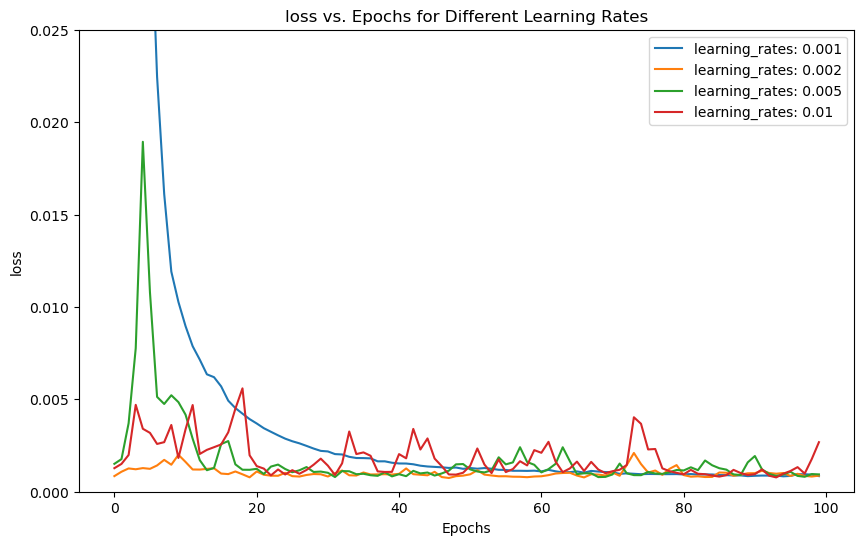

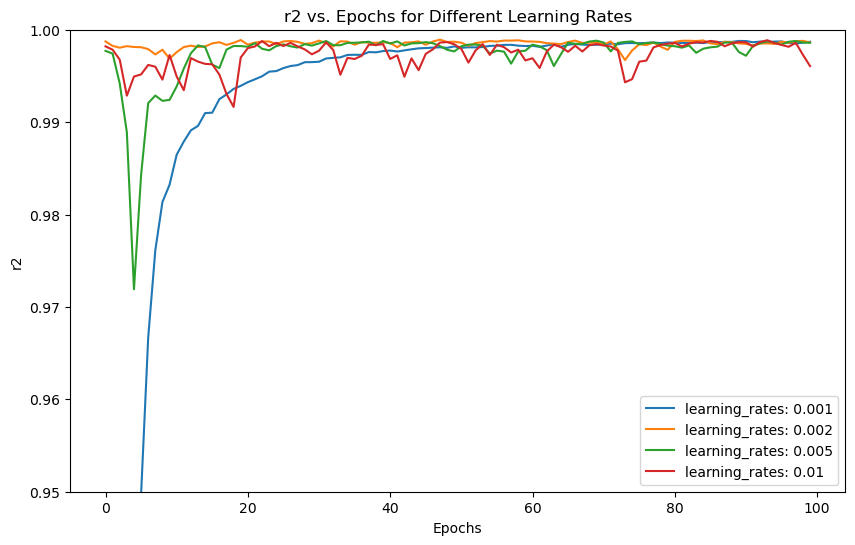

In [26]:
plt.figure(figsize=(10, 6))
for i, n in enumerate(learning_rates):
    plt.plot(losses[i], label=f'learning_rates: {n}')
plt.title('loss vs. Epochs for Different Learning Rates')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.ylim(0, 0.025)
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
for i, n in enumerate(learning_rates):
    plt.plot(r2_values[i], label=f'learning_rates: {n}')
plt.title('r2 vs. Epochs for Different Learning Rates')
plt.xlabel('Epochs')
plt.ylabel('r2')
plt.ylim(0.95, 1)
plt.legend()
plt.show()

In [110]:
def create_model(hidden_neurons):
    model = tf.keras.Sequential([
            tf.keras.layers.Dense(hidden_neurons, activation='relu', input_shape=(6,)), 
            tf.keras.layers.Dense(hidden_neurons, activation='relu'),
            tf.keras.layers.Dense(hidden_neurons, activation='relu'),
            tf.keras.layers.Dense(1)
            ])
    return model
# 定义超参数搜索空间
hidden_neurons=[10, 20,30]
# 记录不同损失值,调整后的r2
losses_2 = []
ad_r2_2 = []
for i in hidden_neurons:
    model = create_model(i)
    model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error', metrics=[rmse,r2_metric,adjusted_r_squared])
    history = model.fit(xg_train_pred_scaled,y_train,epochs=1000,verbose=0,)
    
    # 记录损失值
    losses_2.append(history.history['loss'])
    ad_r2_2.append(history.history['adjusted_r_squared'])

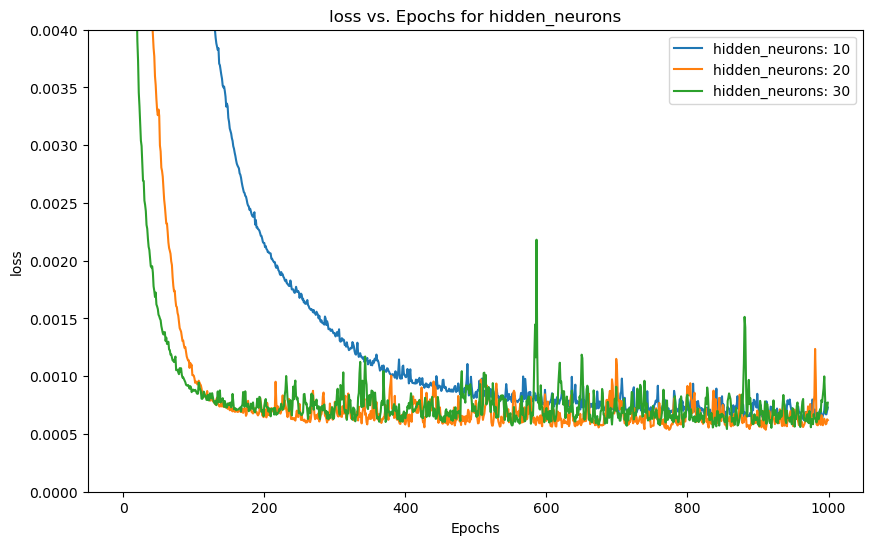

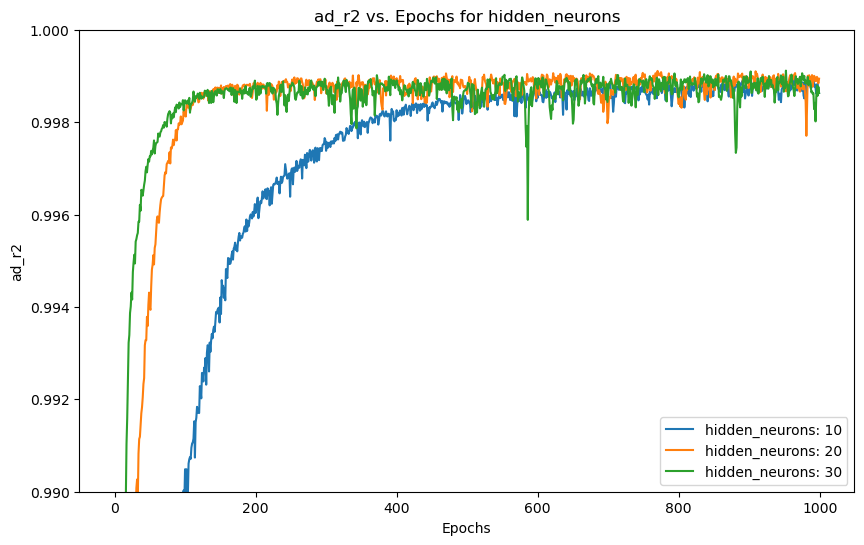

In [112]:
plt.figure(figsize=(10, 6))
for i, n in enumerate(hidden_neurons):
    plt.plot(losses_2[i], label=f'hidden_neurons: {n}')
plt.title('loss vs. Epochs for hidden_neurons')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.ylim(0, 0.004)
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
for i, n in enumerate(hidden_neurons):
    plt.plot(ad_r2_2[i], label=f'hidden_neurons: {n}')
plt.title('ad_r2 vs. Epochs for hidden_neurons')
plt.xlabel('Epochs')
plt.ylabel('ad_r2')
plt.ylim(0.99, 1)
plt.legend()
plt.show()

In [96]:
num_layers=[1,2,3,4,5,6]
def create_model2(hidden_layer):
    model = tf.keras.Sequential()
    model.add(Dense(10, activation='relu', input_shape=(6,)))
    for _ in range(hidden_layer):
        model.add(Dense(10,activation='relu'))
    model.add(Dense(1))
    return model
#X_=xg_train_pred_scaled.values
y_ = y_train.values

# 定义交叉验证方法
k = 5
kf = KFold(n_splits=k)

# 初始化 RMSE 列表
rmse_scores = []

for i in range(0,6):
    # 循环训练和评估
    for train_index, test_index in kf.split(xg_train_pred_scaled):
        X_train2, X_test2 = xg_train_pred_scaled[train_index], xg_train_pred_scaled[test_index]
        y_train2, y_test2 = y_[train_index], y_[test_index]
   
        # 创建和训练模型
        model2 = create_model2(num_layers[i])
        model2.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')
        model2.fit(X_train2, y_train2, epochs=1000, verbose=0)

        # 使用模型进行预测并计算 RMSE
        y_pred2 = model2.predict(X_test2).flatten()
        rmse = np.sqrt(MSE(y_test2, y_pred2))
        rmse_scores.append(rmse)

    # 打印稳定性评估结果
    print(num_layers[i]+1,f'Mean RMSE: {np.mean(rmse_scores):.4f} (+/- {np.std(rmse_scores):.4f})')
    

2/2 [==============================] - 0s 2ms/step
2 Mean RMSE: 0.0362 (+/- 0.0051)
2/2 [==============================] - 0s 2ms/step
3 Mean RMSE: 0.0399 (+/- 0.0101)
2/2 [==============================] - 0s 2ms/step
4 Mean RMSE: 0.0398 (+/- 0.0087)
2/2 [==============================] - 0s 3ms/step
5 Mean RMSE: 0.0406 (+/- 0.0089)
2/2 [==============================] - 0s 2ms/step
6 Mean RMSE: 0.0417 (+/- 0.0095)
2/2 [==============================] - 0s 2ms/step
7 Mean RMSE: 0.0420 (+/- 0.0094)


In [95]:
for i in range(0,6):
    model2 = create_model2(num_layers[i])
    print(model2.summary())

Model: "sequential_314"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1747 (Dense)          (None, 10)                70        
                                                                 
 dense_1748 (Dense)          (None, 10)                110       
                                                                 
 dense_1749 (Dense)          (None, 10)                110       
                                                                 
 dense_1750 (Dense)          (None, 1)                 11        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________
None
Model: "sequential_315"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1751 (Dense)      

IndexError: list index out of range

In [102]:
num_layers2=[1,2,3]
# 记录不同损失值,调整后的r2
losses_3 = []
ad_r2_3 = []
for i in range(0,3):
    model2 = create_model2(num_layers2[i])
    model2.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error', metrics=[rmse,r2_metric,adjusted_r_squared])
    history = model2.fit(xg_train_pred_scaled,y_train,epochs=1000,verbose=0,)
    
    # 记录损失值
    losses_3.append(history.history['loss'])
    ad_r2_3.append(history.history['adjusted_r_squared'])

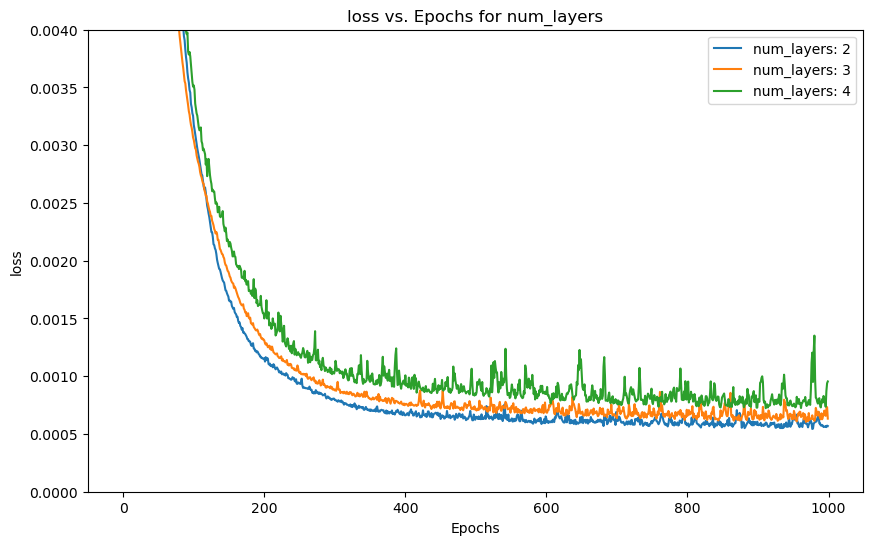

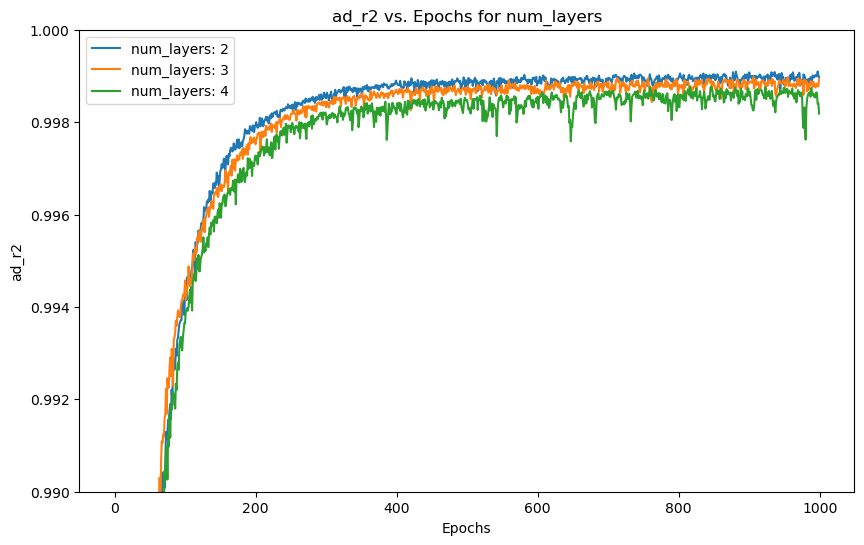

In [106]:
plt.figure(figsize=(10, 6))
for i, n in enumerate(num_layers2):
    plt.plot(losses_3[i], label=f'num_layers: {n+1}')
plt.title('loss vs. Epochs for num_layers')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.ylim(0, 0.004)
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
for i, n in enumerate(num_layers2):
    plt.plot(ad_r2_3[i], label=f'num_layers: {n+1}')
plt.title('ad_r2 vs. Epochs for num_layers')
plt.xlabel('Epochs')
plt.ylabel('ad_r2')
plt.ylim(0.99, 1)
plt.legend()
plt.show()

# 保存模型

In [143]:
xg_reg.save_model('xgb_model_3.25_9719.bin')
model.save('model_3.25_9851.h5')

D:\Anaconda3\envs\env39\lib\site-packages\xgboost\core.py:160: UserWarning: [23:03:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)


In [15]:
# 加载模型
xg_model = xgb.XGBRegressor()
xg_model.load_model('xgb_model_3.25_9719.bin')
nn_model = tf.keras.models.load_model('model_3.25_9851.h5')

In [8]:
# 获取特征重要性
feature_importance = xg_model.feature_importances_

# 打印特征重要性
print("Feature Importance:")
for i, importance in enumerate(feature_importance):
    print(f"Feature {X.columns[i]} importance: {importance}")

Feature Importance:
Feature At0 importance: 0.8168358206748962
Feature V importance: 0.08961440622806549
Feature Ec_mol/L importance: 0.017450451850891113
Feature 4p_g/L importance: 0.028290709480643272
Feature time importance: 0.04780863597989082


In [16]:
nn2_model = tf.keras.models.load_model('model_3.25_9865.h5')

In [17]:
data = pd.read_excel("实验数据.xlsx",sheet_name='Sheet1')
x = train[['At0', 'V', 'Ec_mol/L', '4p_g/L', 'time']]
y = train[['At']]

In [23]:
xg_predict=xg_model.predict(X_test)
scaler = StandardScaler()
xg_pred = xg_predict.reshape(-1, 1)
combined_arr = np.concatenate((X_test, xg_pred), axis=1)
tf_data =  pd.DataFrame(combined_arr, columns=['At0','V', 'Ec_mol/L', '4p_g/L', 'time', 'At'])
tf_data_scaled = scaler.fit_transform(tf_data)

nn_predictions=nn_model.predict(tf_data_scaled)

print(r2_score(y_test, nn_predictions),np.sqrt(MSE(y_test, nn_predictions)))

3/3 [==============================] - 0s 2ms/step
0.9866570356544031 0.10301341493314378


In [16]:
print(r2_score(y_test, xg_predict),np.sqrt(MSE(y_test, xg_predict)))

0.9713795294144714 0.1518015517628386


In [62]:
y_test.to_numpy().max()


2.915

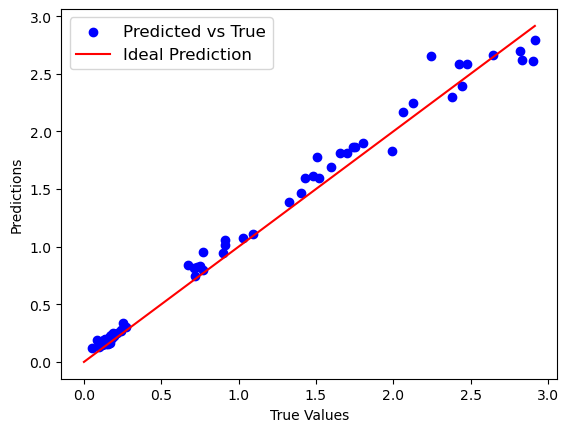

In [32]:
# 绘制预测效果
# 绘制预测值和真实值的散点图
plt.scatter(y_test, nn_predictions, label='Predicted vs True', color='blue')

# 绘制对角线
max_val = max(y_test.to_numpy().max(), nn_predictions.max())
plt.plot([0, max_val], [0, max_val], color='red', label='Ideal Prediction')

plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.legend(fontsize=12)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


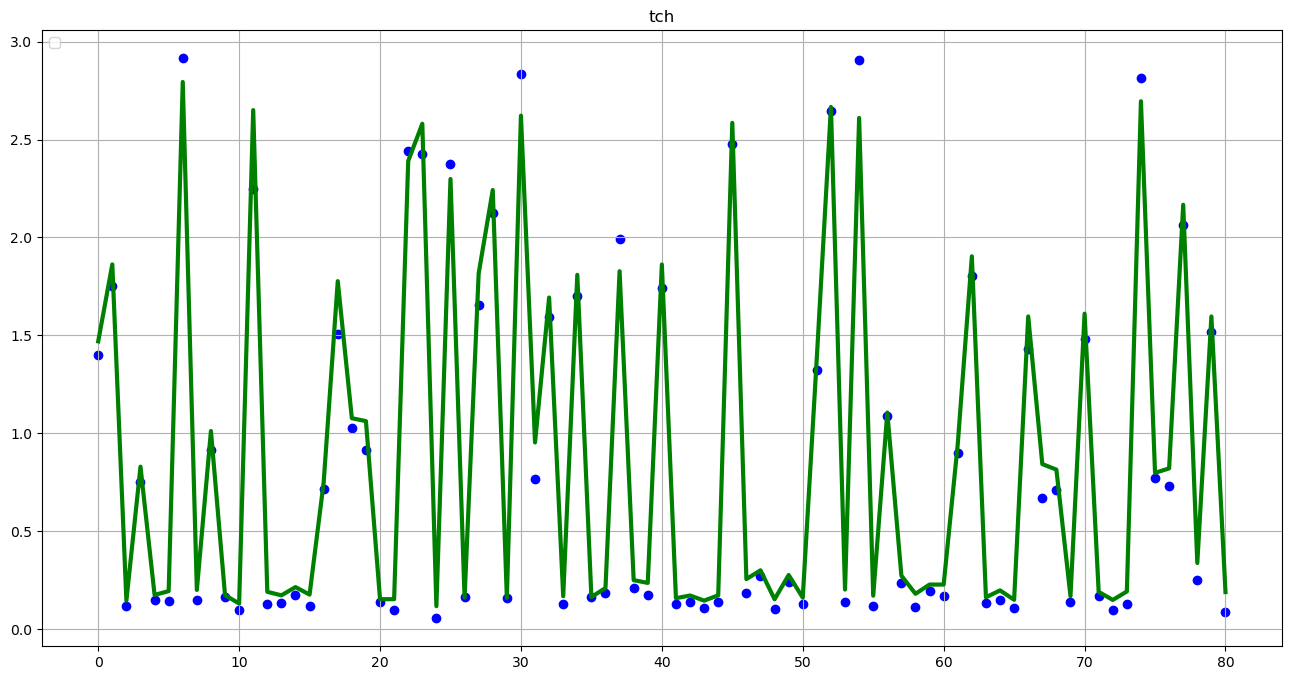

In [29]:
## 画图
colors = ['g-', 'b-']
ln_x_test = range(len(X_test))


plt.figure(figsize=(16,8), facecolor='w')
plt.scatter(ln_x_test, y_test, color='blue')
plt.plot(ln_x_test, nn_predictions, 'g-', lw = 3)
# 图形显示
plt.legend(loc = 'upper left')
plt.grid(True)
plt.title("tch")
#plt.xlim(0, 101)
plt.show()

# 实际预测值

In [474]:
test_data = pd.read_excel("实验数据.xlsx",sheet_name='Sheet2')
test_x = test_data[['xIc', '2v', 'Ec', 'Pd', '5t']]
true_y = test_data['At']
pred = xg_reg.predict(test_x)
print(true_y,pred)

print((test_x['xIc']-pred)/test_x['xIc']*100)

0    0.148
1    0.165
2    0.191
3    0.131
4    0.153
5    2.816
6    2.915
7    2.256
8    2.442
9    1.842
Name: At, dtype: float64 [0.14872344 0.16132614 0.18133359 0.13429609 0.14877535 2.267061
 2.343858   2.2572105  2.3366952  1.8429604 ]
0    53.523926
1    50.053827
2    46.822995
3    58.422263
4    56.370864
5    41.191673
6    39.450839
7    41.447199
8    39.635877
9    52.192987
Name: xIc, dtype: float64


# 使用不同的模型预测

In [102]:
from sklearn.neural_network import MLPRegressor

In [210]:
# 创建MLPRegressor对象，指定两个隐藏层并且每层有5个神经元
mlp = MLPRegressor(hidden_layer_sizes=(10, 10,10), 
                   solver='lbfgs',
                   learning_rate='adaptive',
                   max_fun=1500,
                   max_iter=1000,random_state=0)
# 训练模型
mlp.fit(xg_train_pred_scaled,y_train)
# 测试模型
y_p = mlp.predict(xg_test_pred_scaled)
print(r2_score(y_test,y_p))

0.9737966519152917


C:\Users\H\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [105]:
from sklearn.svm import SVR

In [107]:
#模型构建
model = SVR(kernel='rbf')
model.fit(tf_train,y_train)
svr_pred = model.predict(tf_test)
#获取最优参数
print("准确率",r2_score(y_test,svr_pred))

准确率 0.973737070074841


C:\Users\H\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [108]:
from sklearn.ensemble import RandomForestRegressor as RFR
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [110]:
ref=RFR(n_estimators=100)
ref.fit(tf_train,y_train)
ref_pred = model.predict(tf_test)
print("准确率",r2_score(y_test,ref_pred))

准确率 0.973737070074841


C:\Users\H\AppData\Local\Temp\ipykernel_21264\1553196138.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  ref.fit(tf_train,y_train)


In [111]:
from sklearn.linear_model import LinearRegression as LinearR

In [112]:
rel=LinearR()
rel.fit(X_train,y_train)
pre_rel = rel.predict(X_test)
print(r2_score(y_test,pre_rel))

0.9216896514865465
